In [5]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_palette('colorblind'); sns.set_color_codes()
import statsmodels.formula.api as smf 

#### Code 9.1

In [6]:
d = {'A':[0, 0, 10, 0, 0], 'B':[0, 1, 8, 1, 0], 'C':[0, 2, 6, 2, 0], 'D':[1, 2, 4, 2, 1], 'E':[2, 2, 2, 2, 2]}
p = pd.DataFrame(data=d)

#### Code 9.2

In [7]:
p_norm = p/p.sum(0)

#### Code 9.3

In [8]:
def entropy(x):
    y = []
    for i in x:
        if i == 0:
            y.append(0)
        else: 
            y.append(i*np.log(i))
    h = -sum(y)
    return h
H = p_norm.apply(entropy, axis=0)
print(H)

A   -0.000000
B    0.639032
C    0.950271
D    1.470808
E    1.609438
dtype: float64


#### Code 9.4

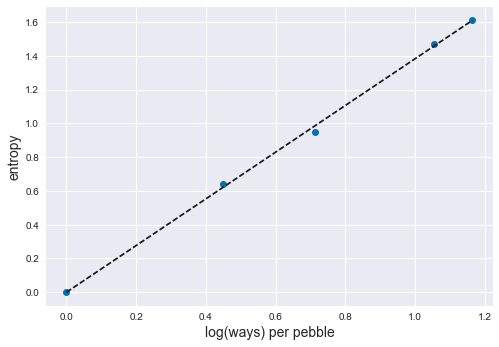

In [9]:
ways = [1, 90, 1260, 37800, 113400]
logwayspp = np.log(ways)/10
plt.plot(logwayspp, H, 'o')
plt.plot([0.0, max(logwayspp)], [0.0, max(H)],'--k')
plt.ylabel('entropy', fontsize=14);
plt.xlabel('log(ways) per pebble', fontsize=14)
plt.show()

#### Code 9.5

In [10]:
# Build list of the candidate distributions.
p = [[1/4, 1/4, 1/4, 1/4], [2/6, 1/6, 1/6, 2/6], [1/6, 2/6, 2/6, 1/6], [1/8, 4/8, 2/8, 1/8]]

# Compute expected value of each. The sum of the multiplied entries is just a dot product.
p_ev = [np.dot(i,[0, 1, 1, 2]) for i in p]
print(p_ev)

[1.0, 1.0, 1.0, 1.0]


#### Code 9.6

In [11]:
# Compute entropy of each distribution
p_ent = [entropy(i) for i in p]
print(p_ent)

[1.3862943611198906, 1.3296613488547582, 1.3296613488547582, 1.2130075659799042]


#### Code 9.7

In [12]:
p = 0.7
A = [(1-p)**2, p*(1-p), (1-p)*p, p**2]
print(A)

[0.09000000000000002, 0.21000000000000002, 0.21000000000000002, 0.48999999999999994]


#### Code 9.8

In [13]:
-np.sum(A*np.log(A))

1.221728604109787

#### Code 9.9

In [14]:
def sim_p(G=1.4):
    x123 = list(np.random.uniform(0,1,(3,)))
    x4 = ((G)*sum(x123)-x123[1]-x123[2])/(2-G)
    x123.append(x4)
    z = sum(x123)
    p = x123 / z
    H = -np.sum(p*np.log(p))
    return H

#### Code 9.10

In [27]:
H = []
for rep in range(10**5):
    H.append(sim_p(G=1.4))


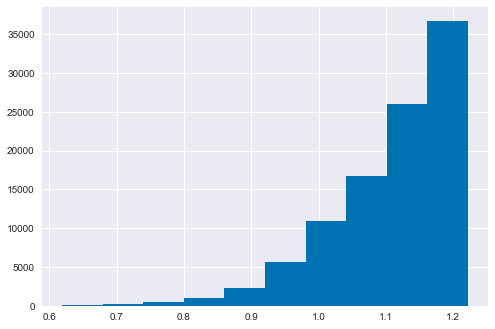

In [28]:
plt.hist(H)
plt.show()